In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

importing code for google drive

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman (1).csv


In [ ]:
data = pd.read_csv("haberman.csv")

In [ ]:
print(data.shape)

(306, 4)


In [ ]:
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
data["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

2D scatter plot

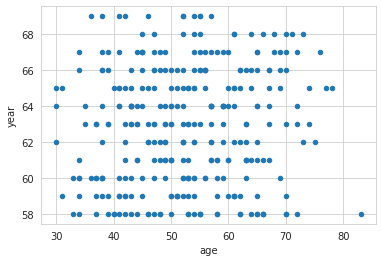

In [ ]:
data.plot(kind='scatter', x='age', y='year') ;
plt.show()

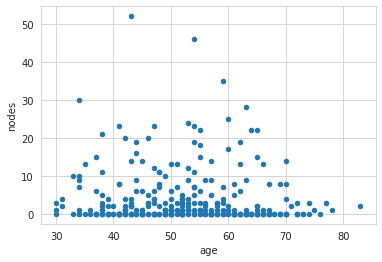

In [ ]:
data.plot(kind='scatter', x='age', y='nodes') ;
plt.show()

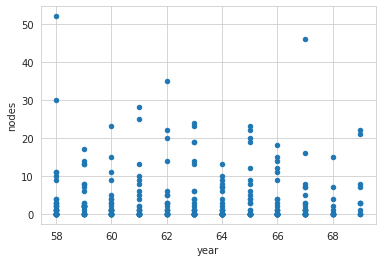

In [ ]:
data.plot(kind='scatter', x='year', y='nodes') ;
plt.show()

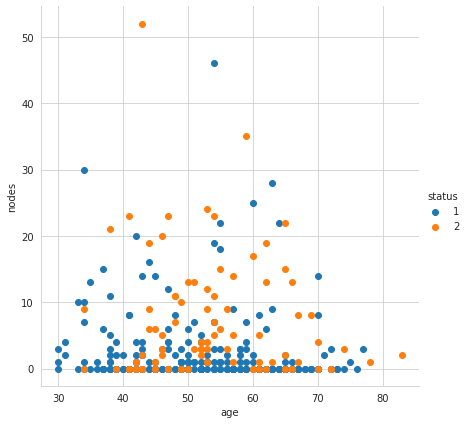

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='status', height=6).map(plt.scatter, 'age', 'nodes').add_legend()
plt.show()

3D scatter plots

Pair Plots


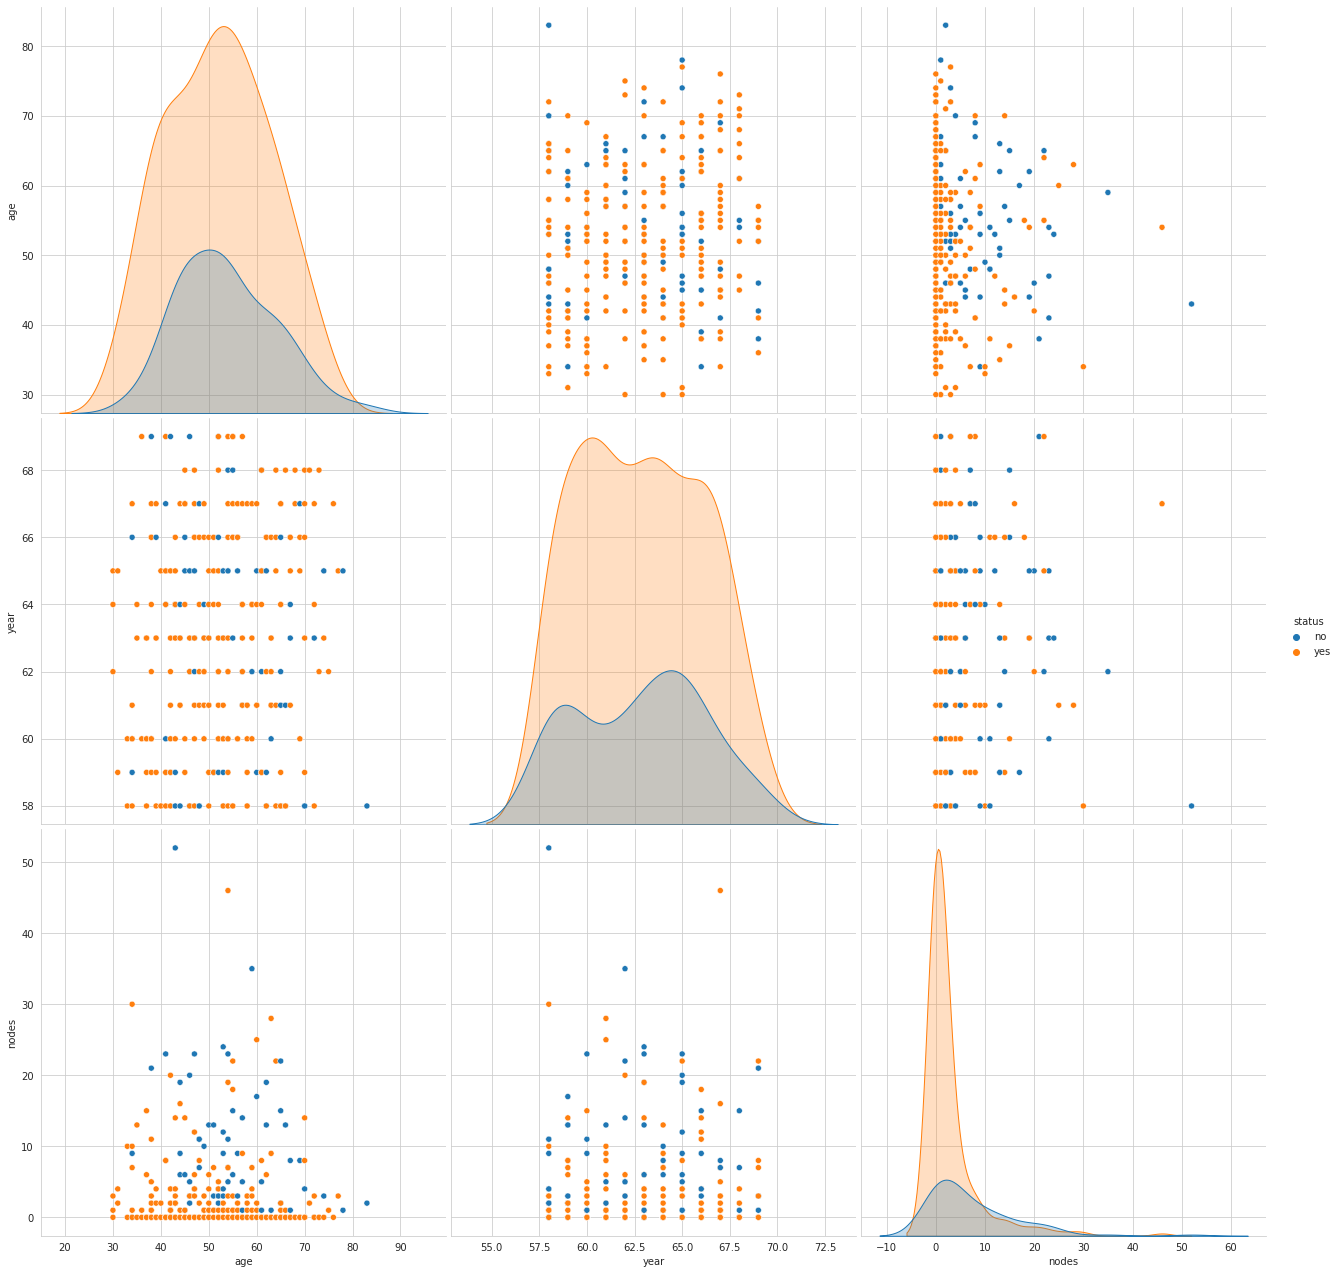

In [ ]:
data['status'] = data['status'].map({1:"yes", 2:"no"})
data['status'] = data['status'].astype('category')

plt.close()
sns.set_style('whitegrid')
sns.pairplot(data, hue='status', height=6, vars=['age', 'year', 'nodes'])
plt.show()

In [ ]:
survival_status_yes = data[data.status == 'yes']
survival_status_no = data[data.status == 'no']

survival_status_yes.head()

,age,year,nodes,status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [ ]:
survival_status_no.head()

,age,year,nodes,status
7,34,59,0,no
8,34,66,9,no
24,38,69,21,no
34,39,66,0,no
43,41,60,23,no


Histogram, PDF, CDF

Univariate Analysis

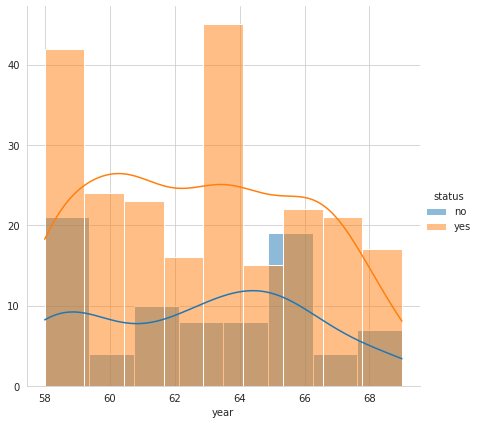

In [ ]:
sns.FacetGrid(data, hue='status', height=6) \
    .map(sns.histplot, 'year', kde=True) \
    .add_legend()

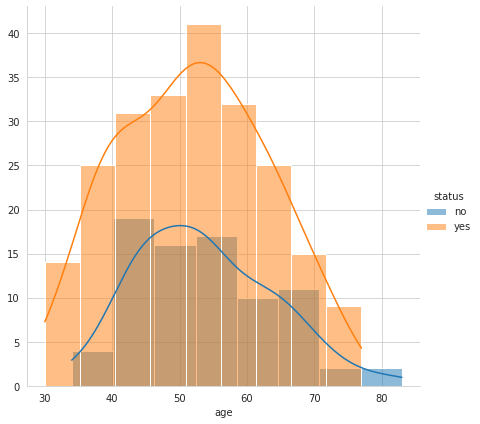

In [ ]:
sns.FacetGrid(data, hue='status', height=6) \
    .map(sns.histplot, 'age', kde=True) \
    .add_legend()

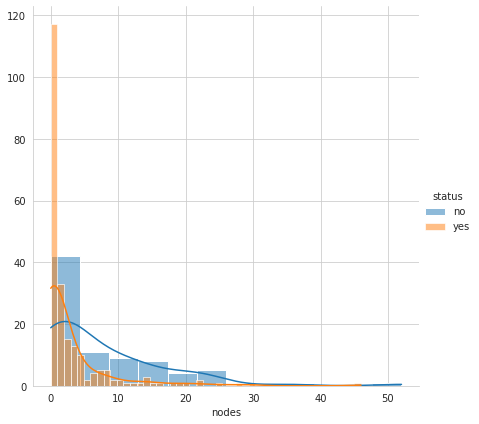

In [ ]:
sns.FacetGrid(data, hue='status', height=6) \
    .map(sns.histplot, 'nodes', kde=True) \
    .add_legend()

bin_edges  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
pdf  [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]


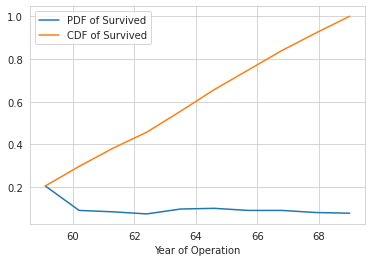

In [ ]:
counts, bin_edges = np.histogram(data['year'], bins=10, density=True)
pdf = counts/sum(counts)
print('bin_edges ', bin_edges)
# bin_edges  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
print('pdf ', pdf)
# pdf  [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719 0.09150327 0.09150327 0.08169935 0.07843137]
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF of Survived', 'CDF of Survived'])
plt.xlabel('Year of Operation')
plt.show()

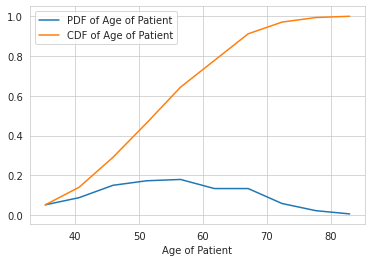

In [ ]:
counts, bin_edges = np.histogram(data['age'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF of Age of Patient', 'CDF of Age of Patient'])
plt.xlabel('Age of Patient')
plt.show()

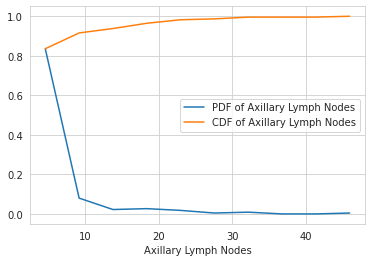

In [ ]:
counts, bin_edges = np.histogram(survival_status_yes['nodes'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF of Axillary Lymph Nodes', 'CDF of Axillary Lymph Nodes'])
plt.xlabel('Axillary Lymph Nodes')
plt.show()

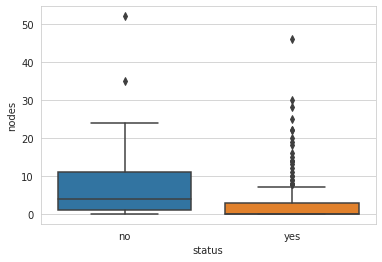

In [ ]:
sns.boxplot(x='status', y='nodes', data=data)

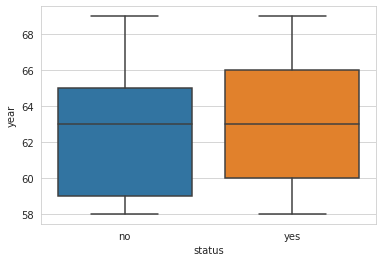

In [ ]:
sns.boxplot(x='status', y='year', data=data)

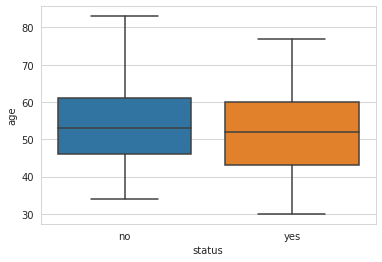

In [ ]:
sns.boxplot(x='status', y='age', data=data)

Violin Plots

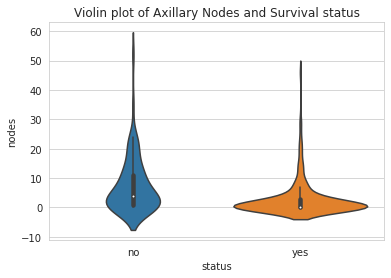

In [ ]:
sns.violinplot(x='status', y='nodes', data=data, size=8)
plt.title('Violin plot of Axillary Nodes and Survival status')
plt.show()

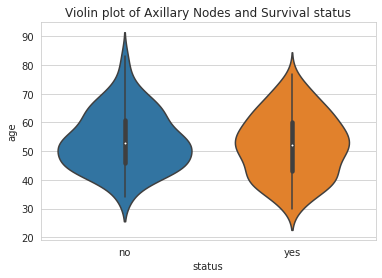

In [ ]:
sns.violinplot(x='status', y='age', data=data, size=8)
plt.title('Violin plot of Axillary Nodes and Survival status')
plt.show()

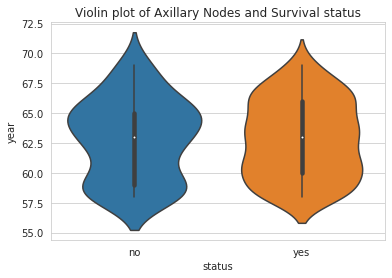

In [ ]:
sns.violinplot(x='status', y='year', data=data, size=8)
plt.title('Violin plot of Axillary Nodes and Survival status')
plt.show()

Contour plots

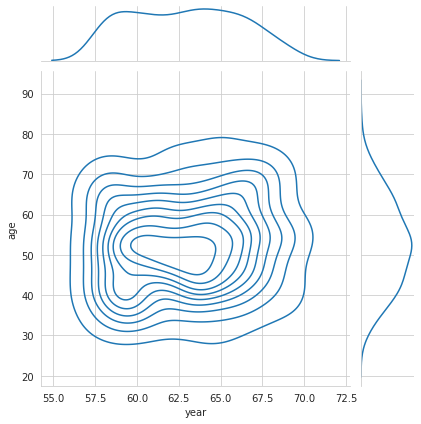

In [ ]:
sns.jointplot(x='year', y='age', data=data, kind="kde" )
plt.show()

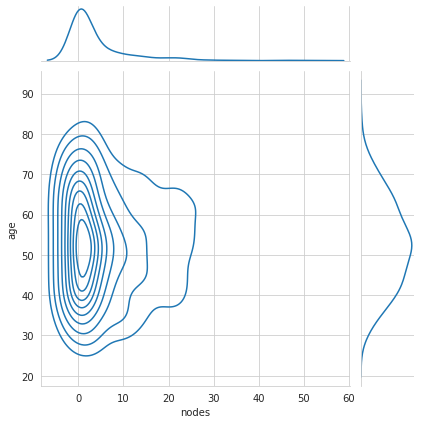

In [ ]:
sns.jointplot(x='nodes', y='age', data=data, kind="kde" )
plt.show()